# Natural Language Processing

## Part 1

In [29]:
import nltk
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\HP\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
pwd

'C:\\Users\\HP\\Desktop\\Python\\DS_ML_Bootcamp'

In [18]:
path='C:\\Users\\HP\\Desktop\\Python\\DS_ML_Bootcamp\\@Source\\20-Natural-Language-Processing\\smsspamcollection\\SMSSpamCollection'
messages=[line.rstrip() for line in open(path, encoding='utf8')]

print(len(messages))

5574


In [19]:
messages[1]

'ham\tOk lar... Joking wif u oni...'

In [20]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [22]:
messages=pd.read_csv(path, sep='\t', names=['label', 'message'])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [23]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
messages.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [28]:
messages['length']=messages['message'].apply(len)
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<AxesSubplot:ylabel='Frequency'>

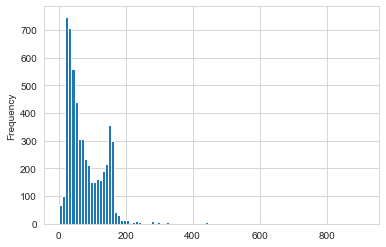

In [32]:
messages['length'].plot.hist(bins=100)

In [33]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [35]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

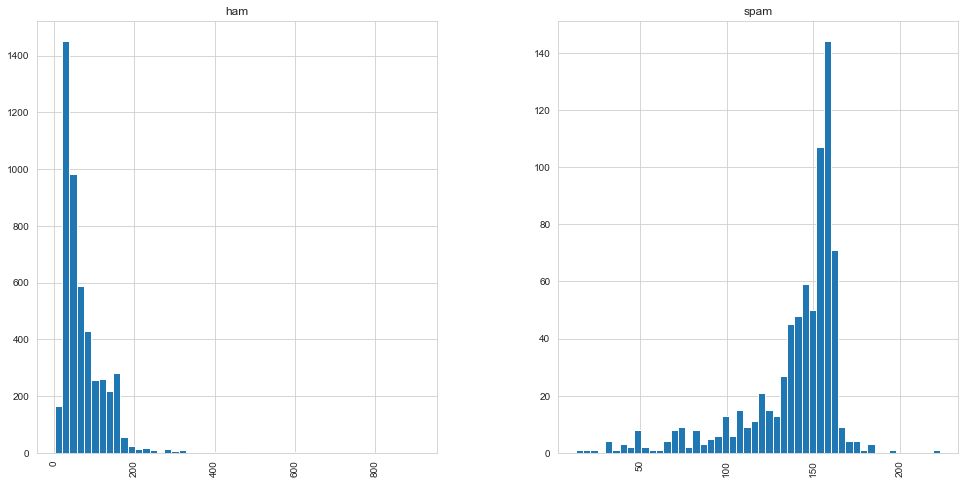

In [41]:
messages.hist(column='length', by='label', bins=50, figsize=(16,8))

#plt.xlim((0,1000))

## Part 2

In [42]:
import string

In [43]:
mess='Sample message! Notice: it has punctuation.'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
nopunc=[c for c in mess if c not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [53]:
nopunc=''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [47]:
from nltk.corpus import stopwords

In [50]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [55]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [57]:
def text_process(mess):
    """
    1. Remove punctuation
    2. Remove stop words
    3. return list of clean text words
    """
    
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [58]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Vectorarization

In [60]:
# 1. Count how many times does a word occur in each message (known as term frequency)
# 2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
# 3. Normalize the vector lenght, to abstract from the original text length (L2 norm)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [64]:
print(len(bow_transformer.vocabulary_))

11425


In [65]:
mess4=messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [67]:
bow4=bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [68]:
print(bow4.shape)

(1, 11425)


In [71]:
bow_transformer.get_feature_names()[9554]

'say'

## Part 3

In [74]:
messages_bow=bow_transformer.transform(messages['message'])

In [75]:
print('Shape of Sparse Matric: ',messages_bow.shape)

Shape of Sparse Matric:  (5572, 11425)


In [81]:
messages_bow.nnz #non zeros

50548

In [82]:
# how many zeros

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [80]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

In [87]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)
tfidf4=tfidf_transformer.transform(bow4)
print(tfidf4) # 'weights' of words for this document

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [89]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']] #inverse word frequency

8.527076498901426

In [90]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [91]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
spam_detect_model=MultinomialNB().fit(messages_tfidf, messages['label'])
spam_detect_model.predict(tfidf4)[0]

'ham'

In [95]:
messages['label'][3]

'ham'

In [96]:
all_pred=spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
msg_train, msg_test, label_train, label_test=train_test_split(messages['message'], messages['label'],test_size=0.3)

In [ ]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(msg_train)
messages_bow=bow_transformer.transform(msg_train)


messages_tfidf=tfidf_transformer.transform(messages_bow)

spam_detect_model=MultinomialNB().fit(messages_tfidf, label_train)


all_pred=spam_detect_model.predict(messages_tfidf)

In [99]:
# Pipeline

from sklearn.pipeline import Pipeline

In [100]:
pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [101]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000277A0FBAD30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [102]:
predictions =pipeline.predict(msg_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(label_test, predictions))
print(confusion_matrix(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1460
        spam       1.00      0.72      0.84       212

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.96      0.96      1672

[[1460    0]
 [  60  152]]


In [105]:
# use classiefier hich you want

from sklearn.ensemble import RandomForestClassifier


pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(msg_train, label_train)
predictions =pipeline.predict(msg_test)

print(classification_report(label_test, predictions))
print(confusion_matrix(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1460
        spam       1.00      0.77      0.87       212

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

[[1460    0]
 [  48  164]]
